# Summary
This notebook includes the followings:
- Read LAS files as pandas df
- Use `holoviews` to avoid oversaturation data visualization


For confidentiality issues, file paths and some outcomes are removed.

# Dealing with LAS files
A LAS (Log ASCII Standard) file is an industry-standard binary format for storing airborne lidar (light detection and ranging) data. Lidar (light detection and ranging) is an optical remote-sensing technique that uses laser light to densely sample the surface of the earth, producing highly accurate x,y,z measurements. See [here](http://desktop.arcgis.com/en/arcmap/10.3/manage-data/las-dataset/what-is-a-las-dataset-.htm) for details.

Python [lasio](https://github.com/kinverarity1/lasio) package can read a LAS file as a pandas dataframe.

In [64]:
import pandas as pd
pd.set_option('display.max_columns',100)
import numpy as np
import lasio

import matplotlib.pyplot as plt
%matplotlib inline

# path control
import os 
from os import listdir
from os.path import isfile, join

import seaborn as sns

In [ ]:
os.chdir('../') # one above folder

## Convert a LAS file to a pandas df

In [2]:
path = 'data/Attachments/Amethyst.las'
las = lasio.read(path)
df = las.df()

In [69]:
print(df.columns)

Index(['DEPT', 'GR', 'F_temp', 'Rw', 'DT', 'Vclay_gr', 'Vclay_nd', 'Vclay_sd',
       'Vclay', 'Vanlcm', 'Salinity', 'DPSC', 'NPSC', 'SPSC', 'PHIT', 'BVW',
       'Sw', 'Net', 'Perm', 'Vanlcm_plt', 'Coal', 'FileName'],
      dtype='object')


In [4]:
df.head()

,GR,CALI,F_temp,SGRC,SP,PSP,SEDP,SEMP,SEXP,Rw,Rmf,AT90,AT30,AT10,RHOB,PHIN,DT,PEF,DRHO,Vclay,Vclay_gr,Vclay_nd,Vclay_sd,Vanlcm,Salinity,PHIT,DPSC,NPSC,SPSC,Sw,Net,Perm,Vanlcm_plt,BVW,Coal
DEPT,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
90.0,NaN,NaN,22.3100,NaN,NaN,NaN,NaN,NaN,NaN,9.8285,9.6048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1500.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0
90.5,NaN,NaN,22.3195,NaN,NaN,NaN,NaN,NaN,NaN,9.8253,9.6017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1500.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0
91.0,NaN,NaN,22.3290,NaN,NaN,NaN,NaN,NaN,NaN,9.8221,9.5986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1500.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0
91.5,NaN,NaN,22.3385,NaN,NaN,NaN,NaN,NaN,NaN,9.8189,9.5954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1500.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0
92.0,NaN,NaN,22.3480,NaN,NaN,NaN,NaN,NaN,NaN,9.8157,9.5923,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1500.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0


## Reindex (extract depth as a feature)

In [5]:
df = df.reset_index(range(len(df)));

In [6]:
df.head()

,DEPT,GR,CALI,F_temp,SGRC,SP,PSP,SEDP,SEMP,SEXP,Rw,Rmf,AT90,AT30,AT10,RHOB,PHIN,DT,PEF,DRHO,Vclay,Vclay_gr,Vclay_nd,Vclay_sd,Vanlcm,Salinity,PHIT,DPSC,NPSC,SPSC,Sw,Net,Perm,Vanlcm_plt,BVW,Coal
0,90.0,NaN,NaN,22.3100,NaN,NaN,NaN,NaN,NaN,NaN,9.8285,9.6048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1500.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0
1,90.5,NaN,NaN,22.3195,NaN,NaN,NaN,NaN,NaN,NaN,9.8253,9.6017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1500.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0
2,91.0,NaN,NaN,22.3290,NaN,NaN,NaN,NaN,NaN,NaN,9.8221,9.5986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1500.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0
3,91.5,NaN,NaN,22.3385,NaN,NaN,NaN,NaN,NaN,NaN,9.8189,9.5954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1500.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0
4,92.0,NaN,NaN,22.3480,NaN,NaN,NaN,NaN,NaN,NaN,9.8157,9.5923,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1500.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0


# Deal with inconsistent columns
## Check all files are readable and check column names

In [ ]:
mypath = 'data/Attachments/'

# df_las = pd.DataFrame()
colnames = {}
dfs = {}
for file in listdir(mypath):
    if file.endswith('.las'):
        filepath = mypath+file
        try:
            las = lasio.read(filepath)
            df = las.df() # convert to dataframe
            df = df.reset_index(range(len(df))); # get original index (depth) as a column
            df['FileName']=file.strip('.las')
            print(file,len(df.columns),df.columns.values)
            colnames[file]=df.columns.values # save column names
            dfs[file]=df # save dataframe
#             df_las = pd.concat([df_las,df],ignore_index=True)
        except:
            print('Error: '+filepath)
            pass

It turns out column names vary across wells.

## Create a dataframe to check column names easily

In [41]:
df_colnames = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in colnames.items() ]))

## Use common columns only
We asked a domain expert to match column names.

In [44]:
df_colnames_examined = pd.read_csv('data/well_log_las_colnames_examined.csv')

In [ ]:
df_colnames_examined = df_colnames_examined.dropna()

## Identify columns with multiple names
Looping over each row and check

In [46]:
for i, row in df_colnames_examined.iterrows():
    if len(set(row)) != 1: # all names are the same
        print(i,set(row))

1 {'GR_BHCS_1', 'DGRC', 'GR'}
10 {'DT', 'DT_BHCS_1'}


In [59]:
df_colnames_examined.shape

(22, 10)

## Merge all data (common columns only)

In [48]:
common_colnames = df_colnames_examined['Amethyst.las'].values # pick a column with common names

In [56]:
df_common = pd.DataFrame()
for key in dfs.keys():
    df = dfs[key][df_colnames_examined[key].values]
    df.columns = common_colnames # rename all columns (the order and length is the same, so it's fine)
    df_common = pd.concat([df_common,df],ignore_index=True)

In [58]:
df_common.shape

(209054, 22)

# Prepare datasets
Seistmic data will have a small subset of well log data. Thus, we may need to create two different models using different subset of features. In the dataset, our target value will be `Sw` (saturation) and `Vclay_gr` (volume).

For now, we will rows with any column value with nans.

In [77]:
df_seis_cols = df_common.dropna(subset=['DT','Sw','Vclay_gr'])[['DT','Sw','Vclay_gr','DEPT','FileName']]
df_all_cols = df_common.dropna()
print('no. cols for the seismic-column data:', df_seis_cols.shape[0])
print('no. cols for all-column data:', df_all_cols.shape[0])

no. cols for the seismic-column data: 159072
no. cols for all-column data: 7121


## Fix outliers (seismic dataset)
### Saturation (Sw)
- Drop all negatives
- Floor values larger than 1 to 1

In [93]:
df_seis_cols = df_seis_cols[(df_seis_cols.Sw>=0)]

In [97]:
df_seis_cols.Sw[df_seis_cols.Sw>1]=1

/Users/hongsupshin/anaconda/envs/snakes/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/hongsupshin/anaconda/envs/snakes/lib/python3.5/site-packages/pandas/core/generic.py:4428: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/Users/hongsupshin/anaconda/envs/snakes/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2885: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

### Vclay_gr
- Should be between 0 and 1. Drop everything outside the range.

In [100]:
df_seis_cols = df_seis_cols[(df_seis_cols.Vclay_gr>=0) & (df_seis_cols.Vclay_gr<=1)]

### DT
- Drop negatives

In [107]:
df_seis_cols = df_seis_cols[df_seis_cols.DT>=0]

## Check distributions (seismic dataset)

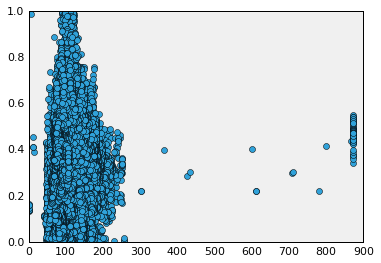

In [150]:
plt.plot(df_seis_cols.DT.values,df_seis_cols.Vclay_gr.values,'o');

In [160]:
# more stringent criterion for outliers
df_seis_shrink = df_seis_cols[df_seis_cols.DT<300]

### Using Holoviews
With a big dataset, it's difficult to figure out spatial relationship in a plot because a lot of data points may overlap (**oversaturation**). `Holoview` solves this problem. See [here](https://anaconda.org/jbednar/plotting_pitfalls/notebook) for more information.

In [140]:
import holoviews as hv
hv.notebook_extension()
%opts Points [color_index=2] (cmap="bwr" edgecolors='k' s=50 alpha=1.0)
%opts Scatter3D [color_index=3 fig_size=250] (cmap='bwr' edgecolor='k' s=50 alpha=1.0)
%opts Image (cmap="gray_r") {+axiswise}

import holoviews.plotting.mpl
holoviews.plotting.mpl.MPLPlot.fig_alpha = 0
holoviews.plotting.mpl.ElementPlot.bgcolor = 'white'

`hv.Points` (scatter plot) takes its first argument as a tuple of two 1-D numpy arrays. The `group` arguments can decide dot size and style. Make sure you use `%%opts` for holoviews configuration.

### DT (velocity) vs. Vclacy_gr (volume)

:Layout
   .Tiny_dots.DT_vs_full_stop_Vclay_gr                                                          :Points   [x,y]
   .Tiny_dots.DT_vs_full_stop_Vclay_gr_left_parenthesis_close_hyphen_minus_up_right_parenthesis :Points   [x,y]
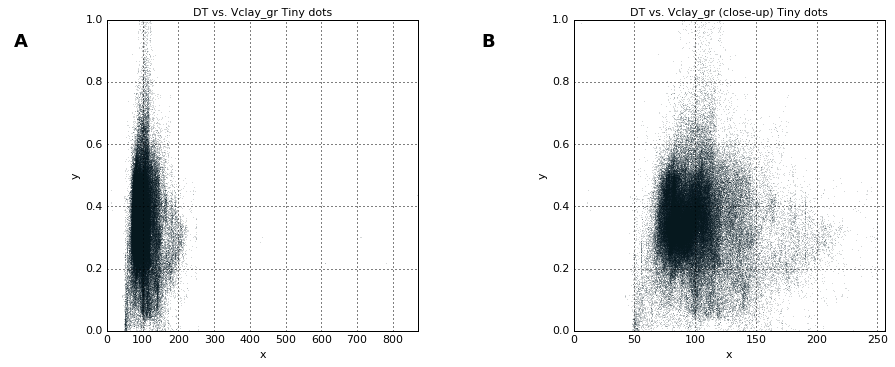

In [166]:
%%output size=150
%%opts Points.Small_dots (s=1 alpha=1) Points.Tiny_dots (s=0.2 alpha=0.2)
hv.Points((df_seis_cols.DT.values,df_seis_cols.Vclay_gr.values),
          label='DT vs. Vclay_gr',group="Tiny dots") +\
hv.Points((df_seis_shrink.DT.values,df_seis_shrink.Vclay_gr.values),
          label='DT vs. Vclay_gr (close-up)',group="Tiny dots")

### DT (velocity) vs. Sw (saturation)

b':Points   [x,y]'
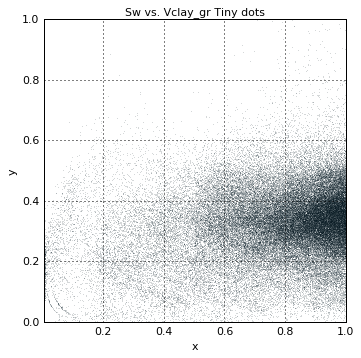

In [172]:
%%output size=150
%%opts Points.Small_dots (s=1 alpha=1) Points.Tiny_dots (s=0.2 alpha=0.2)
hv.Points((df_seis_cols.Sw.values,df_seis_cols.Vclay_gr.values),
          label='Sw vs. Vclay_gr',group="Tiny dots") 

# Build a classifier using all-column dataset
The target variable is Vclay_gr, which is a continuous variable. Thus, fundamentally this is a regression problem. However, we can apply a cut-off to reframe this as a classification problem. 

If Vclay_gr >= cutoff, it's not sand (`True`). If not, it's sand (`False`).

## Create a label

In [315]:
cutoff = 0.20
df_all_cols.loc[:,'target'] = df_all_cols.Vclay_gr<cutoff

/Users/hongsupshin/anaconda/envs/snakes/lib/python3.5/site-packages/pandas/core/indexing.py:461: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


## Create a feature set

In [316]:
df_all_cols.corr()

,DEPT,GR,F_temp,Rw,DT,Vclay_gr,Vclay_nd,Vclay_sd,Vclay,Vanlcm,Salinity,DPSC,NPSC,SPSC,PHIT,BVW,Sw,Net,Perm,Vanlcm_plt,Coal,target
DEPT,1.000000,0.132907,0.997350,-0.895817,-0.833999,0.104733,-0.053224,-0.182641,0.007320,0.049619,0.672104,-0.665699,-0.599881,-0.634959,-0.680519,-0.656704,-0.341302,0.288489,-0.037576,0.051634,NaN,-0.034014
GR,0.132907,1.000000,0.129062,-0.187987,-0.051624,0.446632,0.181182,0.271265,0.250519,0.063249,0.221532,-0.272078,-0.221472,-0.143583,-0.273567,-0.232648,0.031500,-0.026907,-0.031806,0.394089,NaN,-0.303664
F_temp,0.997350,0.129062,1.000000,-0.899402,-0.822150,0.119008,-0.043206,-0.181620,0.022679,0.046777,0.674175,-0.669889,-0.591213,-0.636142,-0.687414,-0.660857,-0.344950,0.284876,-0.038301,0.070151,NaN,-0.039490
Rw,-0.895817,-0.187987,-0.899402,1.000000,0.743612,-0.169288,0.051466,0.150848,-0.061622,-0.073429,-0.912240,0.664825,0.599313,0.652082,0.679008,0.564642,0.263591,-0.157115,0.041462,-0.145534,NaN,0.107995
DT,-0.833999,-0.051624,-0.822150,0.743612,1.000000,-0.025439,0.144305,0.408493,0.149676,-0.117657,-0.546104,0.683754,0.595233,0.766548,0.691628,0.707202,0.402426,-0.326821,0.047279,0.104924,NaN,-0.051120
Vclay_gr,0.104733,0.446632,0.119008,-0.169288,-0.025439,1.000000,0.436880,0.314313,0.561145,0.132205,0.206433,-0.369399,-0.314448,-0.282037,-0.376943,-0.326310,-0.153901,0.103102,-0.065562,0.874783,NaN,-0.446215
Vclay_nd,-0.053224,0.181182,-0.043206,0.051466,0.144305,0.436880,1.000000,0.715442,0.914765,-0.745162,-0.028253,-0.120285,-0.168154,-0.186203,-0.111119,0.061901,0.298231,-0.218366,-0.110894,0.619362,NaN,-0.116331
Vclay_sd,-0.182641,0.271265,-0.181620,0.150848,0.408493,0.314313,0.715442,1.000000,0.719746,-0.579227,-0.073455,-0.109828,-0.271898,0.183763,-0.089118,0.127425,0.415808,-0.294938,-0.079009,0.493265,NaN,-0.109400
Vclay,0.007320,0.250519,0.022679,-0.061622,0.149676,0.561145,0.914765,0.719746,1.000000,-0.681448,0.094676,-0.170319,-0.249957,-0.237752,-0.161421,0.035269,0.272060,-0.264614,-0.078801,0.788875,NaN,-0.252364
Vanlcm,0.049619,0.063249,0.046777,-0.073429,-0.117657,0.132205,-0.745162,-0.579227,-0.681448,1.000000,0.076969,-0.071659,0.099390,0.103958,-0.087960,-0.235177,-0.381919,0.331324,0.103011,-0.087807,NaN,-0.070848


`Coal` gives NaN potentially because there's only one value.

In [317]:
print(df_all_cols.Coal.nunique())

1


In [318]:
all_col_names = df_all_cols.columns.values
print(all_col_names)

['DEPT' 'GR' 'F_temp' 'Rw' 'DT' 'Vclay_gr' 'Vclay_nd' 'Vclay_sd' 'Vclay'
 'Vanlcm' 'Salinity' 'DPSC' 'NPSC' 'SPSC' 'PHIT' 'BVW' 'Sw' 'Net' 'Perm'
 'Vanlcm_plt' 'Coal' 'FileName' 'target']


In [319]:
cols_to_be_gone = ['Vclay_gr','Sw','Coal','FileName','target']
feature_names = list(set(all_col_names).difference(set(cols_to_be_gone)))

In [320]:
df_X = df_all_cols[feature_names]
df_Y = df_all_cols.target

In [321]:
df_Y.value_counts(normalize=True)

False    0.96405
True     0.03595
Name: target, dtype: float64

As expected, we have an imbalanced dataset.

## Build a random forest classifier

In [322]:
import sklearn.metrics
import sklearn.ensemble
import sklearn.cross_validation
from sklearn.metrics import confusion_matrix

In [389]:
clf = sklearn.ensemble.RandomForestClassifier(n_estimators=50,class_weight='balanced',random_state=64)
scores = sklearn.cross_validation.cross_val_score(clf, df_X, df_Y, cv=kfold, scoring='f1_weighted')
print(scores.mean())

0.994330576216


In [390]:
Y_pred = sklearn.cross_validation.cross_val_predict(clf, df_X, df_Y, cv=10)

### Confusion matrix

In [391]:
cm = confusion_matrix(df_Y, Y_pred)
cm_norm = cm/np.max(cm)

In [392]:
print(cm)
print(cm_norm)

[[6464  401]
 [ 108  148]]
[[ 1.          0.06203589]
 [ 0.01670792  0.02289604]]


In [393]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

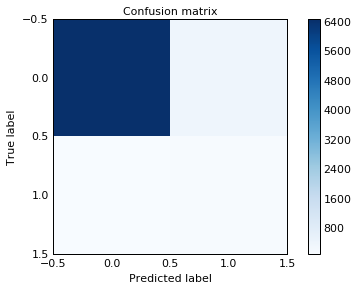

In [394]:
plot_confusion_matrix(cm)

### False positive rate
- True (1) -> Sand
- False (0) -> Non-Sand
- False positive
    - True -> Non-Sand
    - Pred -> Sand
    - Goal is to lower false positive rate.

False positive rate = FP / (FP+TN)

In [395]:
cm

array([[6464,  401],
       [ 108,  148]])

In [396]:
TN = cm[0,0]
TP = cm[1,1]
FN = cm[1,0]
FP = cm[0,1]

In [397]:
FP_rate = FP / (FP+TN)
FP_rate

0.058412235979606701

In [398]:
precision = TP / (TP+FP)
precision

0.26958105646630237

In [400]:
precision_neg = TN / (TN+FN)
precision_neg

0.98356664637857583

In [399]:
recall = TP / (TP+FN)
recall

0.578125